In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [31]:
#Téléchargement des données de Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
rawdata = yf.download(tickers, start='2014-01-01', end='2024-01-01')
data = rawdata["Close"]
for i in tickers:
    Changes = data.pct_change().dropna()

C:\Users\Ribak\AppData\Local\Temp\ipykernel_11536\312745604.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rawdata = yf.download(tickers, start='2014-01-01', end='2024-01-01')
[*********************100%***********************]  5 of 5 completed


In [32]:
#Attribuer un portfolio avec un poids égal pour chaque action
weight = np.array([1/len(tickers)]*len(tickers))
#On veut aussi un portfolie non vide
portfolio_value = 100000

In [33]:
#calcul du retour de notre portfolio 
returns = (Changes * weight).sum(axis=1)
print(returns)

Date
2014-01-03   -0.008686
2014-01-06   -0.005747
2014-01-07    0.009422
2014-01-08    0.002638
2014-01-09   -0.011177
                ...   
2023-12-22   -0.001115
2023-12-26    0.002727
2023-12-27    0.001837
2023-12-28   -0.005374
2023-12-29   -0.007041
Length: 2515, dtype: float64


In [34]:
#calcul du retour sur différents horizons
days = 7
range_returns = returns.rolling(window=days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2014-01-13   -0.034375
2014-01-14    0.022403
2014-01-15    0.040214
2014-01-16    0.040007
2014-01-17    0.029521
                ...   
2023-12-22    0.026416
2023-12-26    0.026530
2023-12-27    0.019877
2023-12-28    0.005994
2023-12-29   -0.007413
Length: 2509, dtype: float64


In [35]:
#0.99 intervalle de confiance
confidence_level = 0.99
VaR = -np.percentile(range_returns, (1 - confidence_level) * 100)*portfolio_value
print(VaR)

11330.652195625813


In [36]:
# Calcul du Value at Risk (VaR) à un niveau de confiance de 95%
confidence_level = 0.95
VaR = -np.percentile(Changes[i], (1 - confidence_level) * 100)
print("We expect to loose no more than" ,round(VaR*100), "% of the position over the next day with a confidence level of", confidence_level*100, "%")

We expect to loose no more than 5 % of the position over the next day with a confidence level of 95.0 %


<Axes: ylabel='Count'>

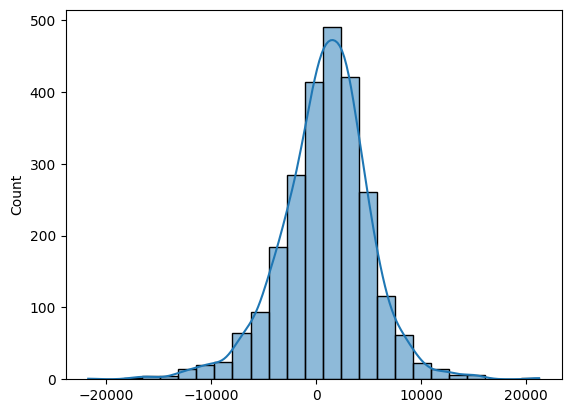

In [37]:
#Graph de la distribuhtion des rendements
range_returns_dollars = range_returns * portfolio_value
sns.histplot(range_returns_dollars, bins=25, kde=True)
